# **1. Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# **2. Load Dataset from Clustering Results**

In [2]:
df = pd.read_csv("hasil_clustering.csv")
print(df.head())

   ClaimAmount  PatientAge  PatientIncome  ProviderSpecialty  ClaimType  \
0      3807.95          16       90279.43                  0          3   
1      9512.07          27      130448.02                  4          3   
2      7346.74          40       82417.54                  0          0   
3      6026.72          65       68516.96                  2          3   
4      1644.58          24       84122.17                  1          1   

   PatientEmploymentStatus  ClaimSubmissionMethod  Cluster  
0                        1                      1        1  
1                        2                      0        1  
2                        0                      0        0  
3                        2                      2        0  
4                        2                      2        0  


In [3]:
X = df.drop(columns=['Cluster'])
y = df['Cluster']

# **3. Data Splitting**

In [4]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check dataset sizes
print("Jumlah data latih:", X_train.shape[0])
print("Jumlah data uji:", X_test.shape[0])


Jumlah data latih: 3600
Jumlah data uji: 900


# **4. Building Classification Models**


## **a. Initialize and Train Models**

In [5]:
# Initialize models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
knn = KNeighborsClassifier()

# Train models
rf_model.fit(X_train, y_train)
knn.fit(X_train, y_train)

# Check models
print("Random Forest:", rf_model)
print("KNN:", knn)

Random Forest: RandomForestClassifier(random_state=42)
KNN: KNeighborsClassifier()


## **b. Evaluate Classification Models**

In [6]:
# Predict with each model
y_pred_rf = rf_model.predict(X_test)
y_pred_knn = knn.predict(X_test)

In [7]:
# Evaluate Random Forest
print("=== Evaluasi Random Forest ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf) * 100, "%")
print(classification_report(y_test, y_pred_rf))

# Evaluate KNN
print("\n=== Evaluasi KNN ===")
print("Accuracy:", accuracy_score(y_test, y_pred_knn) * 100, "%")
print(classification_report(y_test, y_pred_knn))

=== Evaluasi Random Forest ===
Accuracy: 100.0 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       457
           1       1.00      1.00      1.00       443

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900


=== Evaluasi KNN ===
Accuracy: 100.0 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       457
           1       1.00      1.00      1.00       443

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



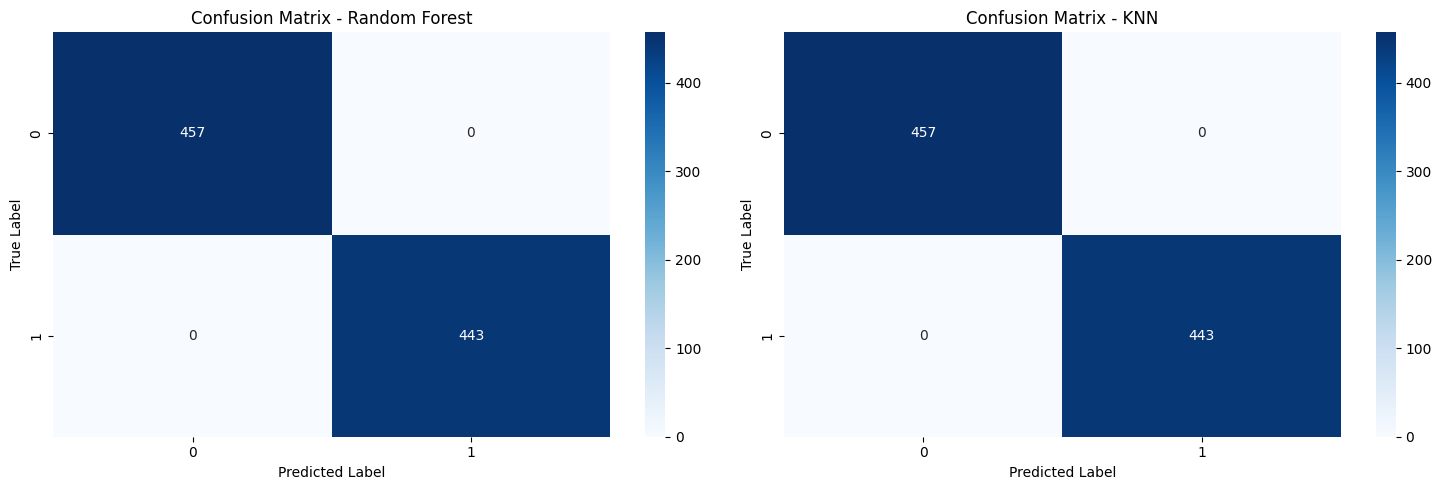

In [8]:
# Confusion Matrix
models = {
    "Random Forest": rf_model,
    "KNN": knn
}

fig, axes = plt.subplots(1, len(models), figsize=(15, 5))

for ax, (name, model) in zip(axes, models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f"Confusion Matrix - {name}")
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")

plt.tight_layout()
plt.show()

# Evaluasi Model: Random Forest vs KNN

## **1. Random Forest**
Akurasi: 100%

Precision, Recall, dan F1-score: Semua bernilai 1.00, menunjukkan performa sempurna dalam klasifikasi.

Kesimpulan : Model ini menunjukkan kinerja yang sangat baik tanpa kesalahan klasifikasi.

## **2. K-Nearest Neighbors (KNN)**
Akurasi: 100%

Precision, Recall, dan F1-score: Sama seperti Random Forest, semua metrik bernilai 1.00.

Kesimpulan: Model ini juga memberikan hasil sempurna.

## Perbandingan dan Kesimpulan
Kedua model menunjukkan akurasi sempurna dengan metrik evaluasi yang identik. Ini bisa menunjukkan bahwa:

  - Data terlalu mudah dipisahkan, sehingga kedua model dapat mengklasifikasikan tanpa kesalahan.

  - Overfitting mungkin terjadi, terutama jika data latih dan uji terlalu mirip atau jumlah fitur terlalu banyak.

  - Perlu pengujian lebih lanjut dengan data yang lebih kompleks atau validasi silang untuk memastikan model benar-benar generalisasi dengan baik.

## **c. Classification Model Tuning**

In [9]:
# Random Forest Hyperparameter Tuning
param_grid_rf = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestClassifier(random_state=42)

# RandomizedSearchCV
rf_random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid_rf,
    n_iter=20,
    cv=5,
    verbose=2,
    n_jobs=-1
)


rf_random_search.fit(X_train, y_train)
print("Best Hyperparameters for Random Forest:", rf_random_search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters for Random Forest: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 10}


In [10]:
# KNN Hyperparameter Tuning
param_grid_knn = {
    'n_neighbors': range(1, 50, 2),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn = KNeighborsClassifier()

# GridSearchCV
knn_grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid_knn,
    cv=5,
    verbose=2,
    n_jobs=-1
)

knn_grid_search.fit(X_train, y_train)
print("Best Hyperparameters for KNN:", knn_grid_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters for KNN: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}


## **d. Evaluate Tuned Models**

In [11]:
# Best RF
best_rf = RandomForestClassifier(
    n_estimators=300,
    min_samples_split=10,
    min_samples_leaf=2,
    max_depth=None,
    random_state=42
)

best_rf.fit(X_train, y_train)
y_pred_rf = best_rf.predict(X_test)

print("=== Evaluasi Random Forest Setelah Tuning ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf) * 100:.2f} %")
print(classification_report(y_test, y_pred_rf))

=== Evaluasi Random Forest Setelah Tuning ===
Accuracy: 100.00 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       457
           1       1.00      1.00      1.00       443

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



In [12]:
cv_scores_rf = cross_val_score(best_rf, X_train, y_train, cv=5)
print(f"Cross-validation RF: {cv_scores_rf}")
print(f"Mean CV Accuracy RF: {cv_scores_rf.mean() * 100:.2f} %")

Cross-validation RF: [1. 1. 1. 1. 1.]
Mean CV Accuracy RF: 100.00 %


In [13]:
# Best KNN
best_knn = KNeighborsClassifier(
    n_neighbors=11,
    metric='euclidean',
    weights='uniform'
)

best_knn.fit(X_train, y_train)
y_pred_knn = best_knn.predict(X_test)

print("=== Evaluasi KNN Setelah Tuning ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn) * 100:.2f} %")
print(classification_report(y_test, y_pred_knn))

=== Evaluasi KNN Setelah Tuning ===
Accuracy: 99.89 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       457
           1       1.00      1.00      1.00       443

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



In [14]:
!pip freeze > requirements.txt

# Analisis Hasil Evaluasi Model Klasifikasi

## 1. Perbandingan Hasil Evaluasi Sebelum dan Setelah Tuning

Dua algoritma yang digunakan dalam eksperimen ini adalah **Random Forest** dan **K-Nearest Neighbors (KNN)**. Berikut adalah perbandingan hasil evaluasi sebelum dan setelah tuning hyperparameter:

### **a. Random Forest**
- Sebelum Tuning:
  - Akurasi: 100%
  - Precision, Recall, F1-score untuk semua kelas: 1.00
- Setelah Tuning:
  - Akurasi: 100%
  - Tidak ada perubahan pada metrik evaluasi
  - Best Hyperparameters: `{'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': None}`
  
Kesimpulan:
- Random Forest tetap mencapai akurasi sempurna sebelum dan setelah tuning.
- Model ini kemungkinan tidak mengalami underfitting atau overfitting, tetapi dapat menunjukkan bahwa dataset memiliki fitur yang sangat kuat dalam membedakan kelas.

### **b. K-Nearest Neighbors (KNN)**
- Sebelum Tuning:
  - Akurasi: 100%
  - Precision, Recall, F1-score untuk semua kelas: 1.00
- Setelah Tuning:
  - Akurasi: 99.89%
  - Best Hyperparameters: `{'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}`
  
Kesimpulan:
- Setelah tuning, akurasi KNN mengalami sedikit penurunan menjadi 99.89%.
- Penurunan ini bisa mengindikasikan bahwa model lebih generalisasi dibanding sebelumnya.
- KNN cenderung lebih sensitif terhadap noise dibanding Random Forest.



## 2. Identifikasi Kelemahan Model

### **a. Overfitting atau Underfitting?**
- Random Forest tetap memiliki akurasi 100% bahkan setelah cross-validation (CV), yang berarti dataset sangat mudah dipisahkan.
- KNN mengalami sedikit penurunan setelah tuning, yang bisa mengindikasikan bahwa tuning membantu mengurangi kemungkinan overfitting.
- Tidak ada tanda-tanda underfitting pada kedua model karena akurasi tetap tinggi.

### b. Precision atau Recall Rendah?
- Precision, recall, dan F1-score pada kedua model tetap tinggi (1.00 atau sangat mendekati).
- Tidak ada kelas yang mengalami ketidakseimbangan dalam prediksi, sehingga model mampu mengklasifikasikan kedua kelas dengan baik.



## 3. Rekomendasi Tindakan Lanjutan

### a. Evaluasi Robustness Model dengan Data Noisy
- Meskipun akurasi sangat tinggi, model perlu diuji dengan data yang mengandung noise untuk memastikan kemampuannya dalam menangani data dunia nyata.
- Uji dengan menambahkan sedikit noise Gaussian pada fitur dan evaluasi ulang akurasi.

### b. Eksperimen dengan Dataset yang Lebih Kompleks
- Jika dataset ini terlalu mudah dipisahkan, maka eksperimen dengan dataset yang lebih kompleks atau dengan lebih banyak fitur yang tumpang tindih bisa menjadi langkah selanjutnya.
- Coba menghapus fitur yang sangat kuat untuk melihat apakah model masih mampu bekerja dengan baik.

### c. Uji dengan Teknik Regularisasi
- Untuk memastikan Random Forest tidak terlalu menghafal data, bisa dilakukan pengujian dengan pruning decision trees atau menggunakan dropout pada fitur tertentu.
- KNN dapat diuji dengan reduksi dimensi (PCA atau t-SNE) untuk melihat apakah hasilnya tetap tinggi.

### d. Mencoba Algoritma Alternatif
- Jika ingin membandingkan dengan model lain, bisa diuji dengan Support Vector Machine (SVM) atau Gradient Boosting (XGBoost, LightGBM) untuk melihat apakah ada peningkatan performa.



## Kesimpulan
- Random Forest dan KNN keduanya memiliki akurasi yang sangat tinggi, dengan Random Forest tetap 100% bahkan setelah tuning.
- KNN lebih generalisasi setelah tuning, meskipun penurunannya sangat kecil (99.89%).
- Tidak ada tanda-tanda overfitting yang jelas, tetapi perlu dilakukan pengujian lebih lanjut dengan data yang lebih kompleks atau noisy.
- Rekomendasi selanjutnya adalah menguji model dengan noise, mencoba dataset lebih sulit, dan mengeksplorasi algoritma lain untuk validasi lebih lanjut.

